# To build a classification model, which predicts Hyper tension of a person

In [2]:
# Loading the dataset
import pandas as pd

df = pd.read_csv('1618841931624_Training Data - Classification of Patients with Abnormal Blood Pressure ....csv')
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [3]:
# Getting the describe of dataset
df.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.356500,0.298000
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.479085,0.457494
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.000000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,0.000000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.000000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


In [4]:
# Getting the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

> This info() method gives information about the counts of Non-Null values and their datatypes in each and every columns of dataset.

> Now, **Genetic_Pedigree_Coefficient**, **alcohol_consumption_per_day** and **Pregnancy** column have so many missing values and now first of all, we are supposed to treat them.

> **Genetic_Pedigree_Coefficient**, **alcohol_consumption_per_day** both columns are Continunous variables, So I will replace all of the Missing values of these columns with their mean.

In [5]:
# Handling missing values of Continuous features
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].replace(np.nan, df['Genetic_Pedigree_Coefficient'].median)
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].replace(np.nan, df['alcohol_consumption_per_day'].median)

# Dropping some irrelevant columns
data = df.drop(['Patient_Number', 'Pregnancy'], axis = 1)

In [6]:
data.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.9,34,23,1,0,45961,48071,<bound method Series.median of 0 NaN\n...,2,1,1
1,0,9.75,0.23,54,33,1,0,26106,25333,205,3,0,0
2,1,10.79,0.91,70,49,0,0,9995,29465,67,2,1,0
3,0,11.00,0.43,71,50,0,0,10635,7439,242,1,0,0
4,1,14.17,0.83,52,19,0,0,15619,49644,397,2,0,0


In [7]:
# loading the stored data
import pandas as pd
pure_data = pd.read_csv('pure_data.csv')
pure_data.head()

,Unnamed: 0,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,0,1,11.28,0.90,34,23,1,0,45961,48071,0.0,2,1,1
1,1,0,9.75,0.23,54,33,1,0,26106,25333,205.0,3,0,0
2,2,1,10.79,0.91,70,49,0,0,9995,29465,67.0,2,1,0
3,3,0,11.00,0.43,71,50,0,0,10635,7439,242.0,1,0,0
4,4,1,14.17,0.83,52,19,0,0,15619,49644,397.0,2,0,0


In [8]:
# Getting the describe of dataset
pure_data.describe()

,Unnamed: 0,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,0.493500,11.710035,0.472055,46.558500,30.081500,0.496000,0.509500,25254.424500,24926.097000,220.636500,2.012500,0.356500,0.298000
std,577.494589,0.500083,2.186701,0.303221,17.107832,11.761208,0.500109,0.500035,14015.439623,14211.692586,157.614106,0.823822,0.479085,0.457494
min,0.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,499.750000,0.000000,10.147500,0.200000,32.000000,20.000000,0.000000,0.000000,13605.750000,13151.750000,79.000000,1.000000,0.000000,0.000000
50%,999.500000,0.000000,11.330000,0.470000,46.000000,30.000000,0.000000,1.000000,25353.000000,25046.500000,212.500000,2.000000,0.000000,0.000000
75%,1499.250000,1.000000,12.945000,0.730000,62.000000,40.000000,1.000000,1.000000,37382.250000,36839.750000,360.250000,3.000000,1.000000,1.000000
max,1999.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


In [9]:
# Handling the Nominal variables using One-Hot Encoding
pd.get_dummies(pure_data, columns=["Sex", 'Chronic_kidney_disease', "Adrenal_and_thyroid_disorders"], prefix=["Sex", "chronic_kidney_disease", 'adrenal_thyroid_disorder']).head()

,Unnamed: 0,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Sex_0,Sex_1,chronic_kidney_disease_0,chronic_kidney_disease_1,adrenal_thyroid_disorder_0,adrenal_thyroid_disorder_1
0,0,1,11.28,0.90,34,23,0,45961,48071,0.0,2,0,1,0,1,0,1
1,1,0,9.75,0.23,54,33,0,26106,25333,205.0,3,0,1,1,0,1,0
2,2,1,10.79,0.91,70,49,0,9995,29465,67.0,2,1,0,0,1,1,0
3,3,0,11.00,0.43,71,50,0,10635,7439,242.0,1,1,0,1,0,1,0
4,4,1,14.17,0.83,52,19,0,15619,49644,397.0,2,1,0,1,0,1,0


In [10]:
#  splitting dataset into features and labels
X = pure_data.drop(columns = ['Blood_Pressure_Abnormality'])
y = pure_data['Blood_Pressure_Abnormality']

In [11]:
#  Scaling or Standardizing of dataset 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Looking at the Transformed data
X_scaled

array([[-1.731185  , -0.19670848,  1.4116839 , ..., -0.01517697,
         1.34352115,  1.53483051],
       [-1.72945295, -0.89656771, -0.79847912, ...,  1.19898069,
        -0.74431281, -0.65153774],
       [-1.7277209 , -0.4208464 ,  1.44467141, ..., -0.01517697,
         1.34352115, -0.65153774],
       ...,
       [ 1.7277209 ,  2.37859055, -0.83146663, ..., -0.01517697,
         1.34352115,  1.53483051],
       [ 1.72945295, -0.25617364,  0.81790876, ...,  1.19898069,
        -0.74431281, -0.65153774],
       [ 1.731185  , -0.16011453, -1.26030423, ..., -1.22933464,
         1.34352115, -0.65153774]])

# Selection of Principal components of data

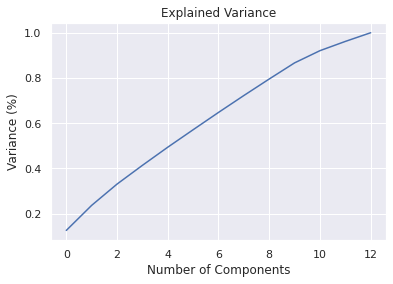

In [12]:
# Selection of Principal components of data using PCA

# Making a new data frame with new columns
new_df = pd.DataFrame(data=X_scaled, columns= X.columns)

# Plotting a ScreePlot for getting the appropriate number of Principal components of data
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(new_df)

# plotting the Screeplot to obtain the Principal components of data
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [13]:
# checking the Multi Collinearity of all features in dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor

#  Getting VIF for Multi-collinearity

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.003704,Unnamed: 0
1,1.292136,Level_of_Hemoglobin
2,1.007024,Genetic_Pedigree_Coefficient
3,1.148023,Age
4,1.025413,BMI
5,1.224276,Sex
6,1.004755,Smoking
7,1.005459,Physical_activity
8,1.007252,salt_content_in_the_diet
9,1.105952,alcohol_consumption_per_day


In [14]:
# Train-Test splitting of dataset

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

In [15]:
# Defining an Accuracy function for getting the prediction
def accuracy(model):
    y_pred = model.predict(X_test)
    Accuracy = accuracy_score(y_test,y_pred)
    print ('Accuracy with', model, 'is => ', Accuracy )


In [16]:
# Fitting logistic regression model
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.944

In [20]:
#  Importing Bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Going with Bagging knn
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5), n_estimators=10, max_samples=0.5, bootstrap=True,
                            random_state=3,oob_score=True) 

#  fitting bag_knn on Train data
bag_knn.fit(X_train, y_train)
accuracy(bag_knn)

Accuracy with BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  oob_score=True, random_state=3) is =>  0.51


In [18]:
# Fitting a Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy(clf)

Accuracy with DecisionTreeClassifier() is =>  0.95


In [21]:
from tpot import TPOTClassifier
from tpot.config import classifier_config_dict
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

# fit xgboost v1.3.0 API

classifier_config_dict['xgboost.XGBClassifier'] = {
    'n_estimators': [100],
    'max_depth': range(1, 11),
    'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
    'subsample': np.arange(0.05, 1.01, 0.05),
    'min_child_weight': range(1, 21),
    'n_jobs': [1], # replace "nthread"
    'verbosity': [0] # add this line to slient warning message
}
        
# for a quick test
tpot = TPOTClassifier(generations=2, population_size=10, verbosity=2,
                      config_dict=classifier_config_dict)
tpot.fit(X_train, y_train)

# Getting Accuracy of XGBoost classifier 
accuracy(tpot)

/home/shriman/anaconda3/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



Generation 1 - Current best internal CV score: 0.9600000000000002

Generation 2 - Current best internal CV score: 0.9600000000000002

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.9000000000000001, min_samples_leaf=3, min_samples_split=19, n_estimators=100)
Accuracy with TPOTClassifier(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                  'l1',
                                                                                  'l2',
                                                                                  'manhattan',
                                                                                  'cosine'],
                                                                     'linkage': ['ward',
                                                                                 'complete',
                                 

In [22]:
#  Fitting a Random Forest ClASSIFIER
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(random_state=6)  
rand_clf.fit(X_train,y_train)
accuracy(rand_clf)

Accuracy with RandomForestClassifier(random_state=6) is =>  0.954


> Here **Random forest** and XGBoost algorithm is giving you a better identical score, so I am going to choose **Random forest** because of it is resource efficient. **XGBoost** may get consider, if it would be a real project.

###  Hyper-Parameter Tuning of Random Forest

In [ ]:
# Creating a Parameter dictionary
grid_param = {
    "n_estimators" : [100,115, 120, 135],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

# Making a GridsearchCV function
grid_search = GridSearchCV(estimator=rand_clf, param_grid=grid_param, cv=5, n_jobs =-1, verbose = 3)

In [ ]:
#  Tuning the Hyper Parameters of Model
grid_search.fit(X_train,y_train)

#  Getting the Best parameters through GridsearchCV
grid_search.best_params_

In [23]:
#  Training again the Model with Best parameters
rand_clf = RandomForestClassifier(criterion= 'entropy', max_features = 'log2',  min_samples_leaf = 1,  min_samples_split= 7,
                                  n_estimators = 100)
rand_clf.fit(X_train,y_train)
accuracy(rand_clf)

Accuracy with RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=7) is =>  0.954


In [24]:
# Confusion Matrix
y_pred = rand_clf.predict(X_test)

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[251,   8],
       [ 15, 226]])

In [26]:
# Getting the contents of a Confusion matrix
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [27]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.954

In [28]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9691119691119691

In [29]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.943609022556391

In [30]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9561904761904761

In [31]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9534356526057771

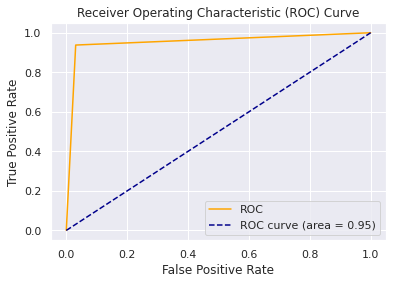

In [32]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [33]:
#  Saving the Trained model into pickle file
import pickle

# Writing different model files to file
with open( 'modelForPrediction.pkl', 'wb') as f:
    pickle.dump(rand_clf,f)
    
with open('sandardScalar.pkl', 'wb') as f:
    pickle.dump(scalar,f)